# Worksheet 06

Name: Shu Xing 
UID: U97658230

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

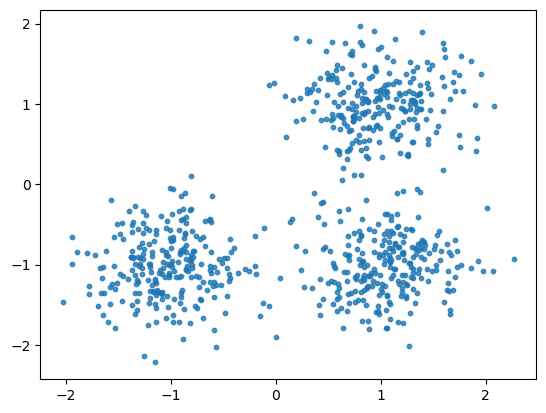

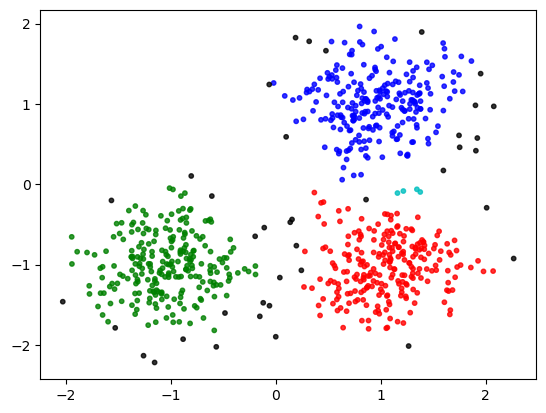

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        visited = np.zeros(len(self.dataset), dtype=bool)
        cluster_labels = np.full(len(self.dataset), -1)
        current_label = 0

        for i in range(len(self.dataset)):
            if visited[i]:
                continue
            visited[i] = True
            neighbors = self._find_neighbors(i)

            if len(neighbors) < self.min_pts:
                cluster_labels[i] = -1
            else:
                self._expand_cluster(i, neighbors, current_label, visited, cluster_labels)
                current_label += 1

        return cluster_labels
    
    def _find_neighbors(self, point_index):
        point = self.dataset[point_index]
        neighbors = []
        for i in range(len(self.dataset)):
            if i == point_index:
                continue
            if np.linalg.norm(self.dataset[i] - point) < self.epsilon:
                neighbors.append(i)
        return neighbors

    def _expand_cluster(self, seed_point_index, neighbors, current_label, visited, cluster_labels):
        cluster_labels[seed_point_index] = current_label

        for neighbor_index in neighbors:
            if not visited[neighbor_index]:
                visited[neighbor_index] = True
                neighbor_neighbors = self._find_neighbors(neighbor_index)
                if len(neighbor_neighbors) >= self.min_pts:
                    neighbors.extend(neighbor_neighbors)

            if cluster_labels[neighbor_index] == -1:
                cluster_labels[neighbor_index] = current_label
                

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()